In [1]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
from ucimlrepo import fetch_ucirepo 
credit= fetch_ucirepo(id=27)
pd.concat([credit['data']['features'],credit['data']['targets']], axis=1).to_csv('../data/feature-engine/credit.csv', index=False)

### Veriyi Hazırlama
Veriyi yükledikten sonra boş değer doldurma üzerine çalışmalar yapcağımız için verinin içerisine boş değer ataması yaparak saklayacağız.

In [3]:
data=pd.read_csv('../data/feature-engine/credit.csv')
profile=ProfileReport(data)
profile.to_file("../outputs/credit-profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'b'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.isna().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
A16     0
dtype: int64

In [16]:
data

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,A16
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,1
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,1
2,824,280.0,g,f,0,NaN,NaN,NaN,h,q,g,u,NaN,24.50,a,1
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,1
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b,0
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a,0
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a,0
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b,0


In [10]:
# Veri icerisinde duzenlemeler yapip uzerinde calisabilecegimiz hale getirip saklayalim.
data['A16'].replace(to_replace={'+':1, '-':0}, inplace=True)
import random
random.seed(9001)
values = [random.randint(0, len(data)) for p in range(0, 100)]
for var in ['A3', 'A8', 'A9', 'A10']:
    data.loc[values, var] = np.nan
data.info()
data.to_csv('../data/feature-engine/creditApprovalUCI.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     598 non-null    object 
 6   A9      598 non-null    object 
 7   A8      598 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      598 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


---------------------

### İçerisinde boş deger olan veriyi yükleme

In [12]:
data=pd.read_csv('../data/feature-engine/creditApprovalUCI.csv')
data.isnull().mean()

A15    0.000000
A14    0.018841
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.133333
A9     0.133333
A8     0.133333
A7     0.013043
A6     0.013043
A5     0.008696
A4     0.008696
A3     0.133333
A2     0.017391
A1     0.017391
A16    0.000000
dtype: float64

In [13]:
data_clean=data.dropna()

In [15]:
print(f"Orijinal verinin boyutu: {len(data)}")
print(f"Temizlenmis verinin boyutu: {len(data_clean)}")

Orijinal verinin boyutu: 690
Temizlenmis verinin boyutu: 564


Bos degerleri ortalama ve medyan degerleri ile doldurabiliriz. Bu islem sadece sayisal degiskenler icin gecerlidir. Bu degerler egitim verisinde hesaplanir ve egitim ve test verisinde bos degerler bu deger ile doldurulur. Bu islemler icin scikit-learn ve feature-engine kutuphaneleri kullanilarak yapilabilir.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer

In [21]:
x=data.drop('A16', axis=1)
y=data[['A16']]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 15), (207, 15), (483, 1), (207, 1))

In [22]:
# Egitim verisinde bos degerlerin oranini gorelim bi
X_train.isnull().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.140787
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.140787
A2     0.022774
A1     0.008282
dtype: float64

In [23]:
X_train.dtypes

A15      int64
A14    float64
A13     object
A12     object
A11      int64
A10     object
A9      object
A8     float64
A7      object
A6      object
A5      object
A4      object
A3     float64
A2     float64
A1      object
dtype: object

In [25]:
# Sayisal degiskenlerde doldurma islemlerine ilgilenecegiz. Manuel olarak her feature icin for dongusu ile yapalim.
sayisal_degiskenler = X_train.select_dtypes(include=[np.float64, np.int64]).columns
sayisal_degiskenler

for degisken in sayisal_degiskenler:
    deger=X_train[degisken].median()
    X_train[degisken].fillna(deger, inplace=True )
    X_test[degisken].fillna(deger, inplace=True)
X_train.isnull().mean()

Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

Scikit-learn kutuphanesi kulllanarak yapmak istersek sayisal verileri secerek yapilmasi gerekmektedir.

In [26]:
X_train[sayisal_degiskenler]

,A15,A14,A11,A8,A3,A2
596,4159,396.0,8,2.375,3.000,46.08
303,0,120.0,0,0.085,2.875,15.92
204,1187,50.0,1,0.085,2.125,36.33
351,0,100.0,0,0.000,0.585,22.17
118,1332,360.0,6,14.000,7.040,57.83
...,...,...,...,...,...,...
359,0,160.0,0,0.000,4.710,36.75
192,600,510.0,0,2.500,0.960,41.75
629,5,220.0,0,1.665,0.665,19.58
559,2384,140.0,7,2.290,2.290,22.83


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train[sayisal_degiskenler])
imputer.statistics_

SimpleImputer(strategy='median')

array([  6.   , 160.   ,   0.   ,   1.   ,   2.75 ,  28.835])

In [30]:
X_train[sayisal_degiskenler]=imputer.transform(X_train[sayisal_degiskenler])
X_test[sayisal_degiskenler]=imputer.transform(X_test[sayisal_degiskenler])
X_train.isnull().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

### Sklearn de Pipeline ve ColumnTransformer ile calisma
<img src="../images/pipeline.png">

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# sklearn ciktisini numpy array olarak donmektedir. Bu adimi pandas icin ayarlayabiliriz.
from sklearn import set_config
set_config(transform_output="pandas")


sayisal_imputer=SimpleImputer(strategy='median')
preprocessor= ColumnTransformer(transformers=[
                                ('median_imputer', sayisal_imputer, sayisal_degiskenler)
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object'))])

In [33]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_train.isnull().mean()

median_imputer__A15    0.000000
median_imputer__A14    0.000000
median_imputer__A11    0.000000
median_imputer__A8     0.000000
median_imputer__A3     0.000000
median_imputer__A2     0.000000
remainder__A13         0.000000
remainder__A12         0.000000
remainder__A10         0.140787
remainder__A9          0.140787
remainder__A7          0.008282
remainder__A6          0.008282
remainder__A5          0.008282
remainder__A4          0.008282
remainder__A1          0.008282
dtype: float64

Scikit-learn kutuphanesinden ColumnTransformer ile yapabilecegi gibi feature-engine kullanarak secme islemi yapmadan daha hizli yapabiliriz.

In [35]:
sayisal_degiskenler.to_list()

['A15', 'A14', 'A11', 'A8', 'A3', 'A2']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
ImputerEngine=MeanMedianImputer(imputation_method='median', variables=sayisal_degiskenler.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

MeanMedianImputer(variables=['A15', 'A14', 'A11', 'A8', 'A3', 'A2'])

{'A15': 6.0, 'A14': 160.0, 'A11': 0.0, 'A8': 1.0, 'A3': 2.75, 'A2': 28.835}

In [37]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

#### Kategorik Degiskenler
Kategorik degiskenlerde bos degerleri doldurma islemleri degiskenin mode yani en sik gozlemlenen deger ile doldurabilir.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
kategorik_degiskenler = X_train.select_dtypes(exclude=[np.float64, np.int64]).columns
kategorik_degiskenler

Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')

In [39]:
X_train[kategorik_degiskenler].isnull().mean()

A13    0.000000
A12    0.000000
A10    0.140787
A9     0.140787
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A1     0.008282
dtype: float64

##### for dongusu ile

In [43]:
for degisken in kategorik_degiskenler:
    deger=X_train[degisken].mode()[0]
    X_train[degisken].fillna(deger, inplace=True )
    X_test[degisken].fillna(deger, inplace=True)
X_train[kategorik_degiskenler].isnull().mean()

A13    0.0
A12    0.0
A10    0.0
A9     0.0
A7     0.0
A6     0.0
A5     0.0
A4     0.0
A1     0.0
dtype: float64

##### scikit-learn ile 

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

kategorik_imputer=SimpleImputer(strategy='most_frequent')

preprocessor= ColumnTransformer(transformers=[
                                ('kategorik_imputer', kategorik_imputer, kategorik_degiskenler)
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorik_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

In [45]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_train.isnull().mean()

kategorik_imputer__A13    0.000000
kategorik_imputer__A12    0.000000
kategorik_imputer__A10    0.000000
kategorik_imputer__A9     0.000000
kategorik_imputer__A7     0.000000
kategorik_imputer__A6     0.000000
kategorik_imputer__A5     0.000000
kategorik_imputer__A4     0.000000
kategorik_imputer__A1     0.000000
remainder__A15            0.000000
remainder__A14            0.014493
remainder__A11            0.000000
remainder__A8             0.140787
remainder__A3             0.140787
remainder__A2             0.022774
dtype: float64

#### feature-engine ile

In [47]:
from feature_engine.imputation import CategoricalImputer
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
ImputerEngine=CategoricalImputer(imputation_method='frequent', variables=kategorik_degiskenler.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

CategoricalImputer(imputation_method='frequent',
                   variables=['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4',
                              'A1'])

{'A13': 'g',
 'A12': 'f',
 'A10': 'f',
 'A9': 't',
 'A7': 'v',
 'A6': 'c',
 'A5': 'g',
 'A4': 'u',
 'A1': 'b'}

In [48]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

A15    0.000000
A14    0.014493
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.000000
A9     0.000000
A8     0.140787
A7     0.000000
A6     0.000000
A5     0.000000
A4     0.000000
A3     0.140787
A2     0.022774
A1     0.000000
dtype: float64

#### Secilen deger ile doldurma
Bazi durumlarda alan bilgisine ozel veriler ile doldurma yapilabilir.


In [49]:
# https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

kategorik_imputer=SimpleImputer(strategy='constant', fill_value='missing')
sayisal_imputer=SimpleImputer(strategy='constant', fill_value=9999)

preprocessor= ColumnTransformer(transformers=[
    ('sayisal_imputer', sayisal_imputer, sayisal_degiskenler),
    ('kategorik_imputer', kategorik_imputer, kategorik_degiskenler)
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
# Egitim verisinde ne kadar deger doldurulmus bir bakalim
((X_train=='missing') | (X_train==9999)).sum()

ColumnTransformer(remainder='passthrough',
                  transformers=[('sayisal_imputer',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 Index(['A15', 'A14', 'A11', 'A8', 'A3', 'A2'], dtype='object')),
                                ('kategorik_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12', 'A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object'))])

sayisal_imputer__A15       0
sayisal_imputer__A14       7
sayisal_imputer__A11       0
sayisal_imputer__A8       68
sayisal_imputer__A3       68
sayisal_imputer__A2       11
kategorik_imputer__A13     0
kategorik_imputer__A12     0
kategorik_imputer__A10    68
kategorik_imputer__A9     68
kategorik_imputer__A7      4
kategorik_imputer__A6      4
kategorik_imputer__A5      4
kategorik_imputer__A4      4
kategorik_imputer__A1      4
dtype: int64

In [50]:
from feature_engine.imputation import ArbitraryNumberImputer
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
ImputerEngine=ArbitraryNumberImputer(arbitrary_number=9999, variables=sayisal_degiskenler.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

ArbitraryNumberImputer(arbitrary_number=9999,
                       variables=['A15', 'A14', 'A11', 'A8', 'A3', 'A2'])

{'A15': 9999, 'A14': 9999, 'A11': 9999, 'A8': 9999, 'A3': 9999, 'A2': 9999}

In [52]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

A15    0.000000
A14    0.000000
A13    0.000000
A12    0.000000
A11    0.000000
A10    0.140787
A9     0.140787
A8     0.000000
A7     0.008282
A6     0.008282
A5     0.008282
A4     0.008282
A3     0.000000
A2     0.000000
A1     0.008282
dtype: float64

#### Rastgele degerler ile doldurma

In [53]:
from feature_engine.imputation import RandomSampleImputer
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

# Bos degerlerin oldugu indisleri saklayalim ve neyle doldurmus inceleyelim.
bos_a10_index = X_train[X_train.A10.isna()==True].index
bos_a14_index = X_train[X_train.A14.isna()==True].index


ImputerEngine=RandomSampleImputer(random_state=0)
ImputerEngine.fit(X_train)
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

RandomSampleImputer(random_state=0)

A15    0.0
A14    0.0
A13    0.0
A12    0.0
A11    0.0
A10    0.0
A9     0.0
A8     0.0
A7     0.0
A6     0.0
A5     0.0
A4     0.0
A3     0.0
A2     0.0
A1     0.0
dtype: float64

In [54]:
# A10 feature icin rasgele doldurma yaparken neleri kullnamis bir bakalim.
X_train.loc[bos_a10_index,:].A10.value_counts()

A10
f    34
t    34
Name: count, dtype: int64

In [55]:
X_train.loc[bos_a14_index,:]

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
206,0,350.0,p,f,0,f,f,0.000,v,c,g,u,0.000,71.58,a
243,26726,17.0,g,f,5,f,t,0.875,v,q,g,u,0.375,18.75,a
270,0,60.0,p,f,0,f,f,0.000,j,j,g,u,0.000,37.58,b
626,0,140.0,g,t,0,f,f,0.165,bb,i,p,y,7.835,22.00,b
592,0,381.0,p,f,0,f,f,0.000,h,i,p,y,0.000,23.17,b
445,5200,260.0,g,f,0,f,f,0.000,ff,ff,g,u,11.250,27.67,a
622,0,420.0,p,f,0,f,f,0.000,v,w,g,u,0.000,25.58,a


#### Bos degerlerle ilgili yeni ozellik olarak ekleme
KDD, [Winning the KDD Cup Orange Challenge with Ensemble Selection](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf)


In [56]:
from feature_engine.imputation import AddMissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
ImputerEngine=AddMissingIndicator()
ImputerEngine.fit(X_train)
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

AddMissingIndicator()

A15       0.000000
A14       0.014493
A13       0.000000
A12       0.000000
A11       0.000000
A10       0.140787
A9        0.140787
A8        0.140787
A7        0.008282
A6        0.008282
A5        0.008282
A4        0.008282
A3        0.140787
A2        0.022774
A1        0.008282
A14_na    0.000000
A10_na    0.000000
A9_na     0.000000
A8_na     0.000000
A7_na     0.000000
A6_na     0.000000
A5_na     0.000000
A4_na     0.000000
A3_na     0.000000
A2_na     0.000000
A1_na     0.000000
dtype: float64

In [65]:
mi_train

,missingindicator_A14,missingindicator_A10,missingindicator_A9,missingindicator_A8,missingindicator_A7,missingindicator_A6,missingindicator_A5,missingindicator_A4,missingindicator_A3,missingindicator_A2,missingindicator_A1
596,False,False,False,False,False,False,False,False,False,False,False
303,False,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,False
351,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
359,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False
629,False,False,False,False,False,False,False,False,False,False,False
559,False,False,False,False,False,False,False,False,False,False,False


In [66]:
from sklearn.impute import MissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

indicator=MissingIndicator()
indicator.fit(X_train)
mi_train = indicator.transform(X_train)
X_train = pd.concat([X_train, mi_train], axis=1)
X_train.replace(to_replace={True:1, False:0})

MissingIndicator()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,...,missingindicator_A10,missingindicator_A9,missingindicator_A8,missingindicator_A7,missingindicator_A6,missingindicator_A5,missingindicator_A4,missingindicator_A3,missingindicator_A2,missingindicator_A1
596,4159,396.0,g,t,8,t,t,2.375,v,c,...,0,0,0,0,0,0,0,0,0,0
303,0,120.0,g,f,0,f,f,0.085,v,q,...,0,0,0,0,0,0,0,0,0,0
204,1187,50.0,g,f,1,t,t,0.085,v,w,...,0,0,0,0,0,0,0,0,0,0
351,0,100.0,g,f,0,f,f,0.000,ff,ff,...,0,0,0,0,0,0,0,0,0,0
118,1332,360.0,g,t,6,t,t,14.000,v,m,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,160.0,g,f,0,f,f,0.000,ff,ff,...,0,0,0,0,0,0,0,0,0,0
192,600,510.0,g,f,0,f,t,2.500,v,x,...,0,0,0,0,0,0,0,0,0,0
629,5,220.0,g,f,0,f,f,1.665,v,w,...,0,0,0,0,0,0,0,0,0,0
559,2384,140.0,g,t,7,t,t,2.290,h,q,...,0,0,0,0,0,0,0,0,0,0


#### Komsular ile doldurma

In [68]:
from sklearn.impute import KNNImputer

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

X_train.A14[[206]]

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train[sayisal_degiskenler])

X_train[sayisal_degiskenler]=imputer.transform(X_train[sayisal_degiskenler])
X_test[sayisal_degiskenler]=imputer.transform(X_test[sayisal_degiskenler])

X_train[sayisal_degiskenler].isna().sum()
X_train.A14[[206]]

206   NaN
Name: A14, dtype: float64

KNNImputer()

A15    0
A14    0
A11    0
A8     0
A3     0
A2     0
dtype: int64

206    331.8
Name: A14, dtype: float64

#### Bos degerler ile Model bazli ugrasma
[Multiple imputation by chained equations(MICE): what is it and how does it work?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)

[Why Can Multiple Imputations and How (MICE) Algorithm Work?](https://www.scirp.org/journal/paperinformation?paperid=112455)

Çok değişkenli imputasyon yöntemleri, tek değişkenli imputasyonun aksine, kayıp değerleri tahmin etmek için tüm değişken kümesini kullanır. Başka bir deyişle, bir değişkenin kayıp değerleri veri setindeki diğer değişkenlere dayalı olarak modellenir. Zincirleme denklemlerle çok değişkenli imputasyon (MICE), kayıp değerlere sahip her bir değişkeni kalan değişkenlerin bir fonksiyonu olarak modelleyen ve imputasyon için bu tahmini kullanan bir çoklu imputasyon tekniğidir. MICE aşağıdaki temel adımlara sahiptir:
1. Kayıp verisi olan her değişken için basit bir tek değişkenli imputasyon gerçekleştirilir, örneğin medyan imputasyonu.
2. Belirli bir değişken seçilir, örneğin var_1, ve kayıp değerler tekrar kayıp olarak ayarlanır.
3. Veri kümesindeki kalan değişkenlere dayalı olarak var_1'i tahmin etmek için kullanılan bir model oluşturulur.
4. var_1'in eksik değerleri yeni tahminlerle değiştirilir.
5. Kalan değişkenlerin her biri için 2. adımdan 4. adıma kadar tekrarlanir.

<img src="../images/mice.png">

In [71]:
# Verilerin sayisal olmasi lazim.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), initial_strategy='mean', random_state=0)

degiskenler = sayisal_degiskenler

imputer.fit(X_train[degiskenler])

X_train[degiskenler]=imputer.transform(X_train[degiskenler])
X_test[degiskenler]=imputer.transform(X_test[degiskenler])
X_train.A14[[206]]

IterativeImputer(estimator=BayesianRidge(), random_state=0)

206    191.35808
Name: A14, dtype: float64

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.impute import IterativeImputer

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

imputer_dct = IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), initial_strategy='mean', max_iter=100, random_state=0)
imputer_ext = IterativeImputer(estimator=ExtraTreesRegressor(random_state=0), initial_strategy='mean', max_iter=100, random_state=0)
imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='mean', max_iter=100, random_state=0)

degiskenler = sayisal_degiskenler

imputer_dct.fit(X_train[degiskenler])
imputer_ext.fit(X_train[degiskenler])
imputer_knn.fit(X_train[degiskenler])

X_train_dct=imputer_dct.transform(X_train[degiskenler])
X_test_dct=imputer_dct.transform(X_test[degiskenler])
X_train_dct.A14[[206]]

X_train_ext=imputer_ext.transform(X_train[degiskenler])
X_test_ext=imputer_ext.transform(X_test[degiskenler])
X_train_ext.A14[[206]]

X_train_knn=imputer_knn.transform(X_train[degiskenler])
X_test_knn=imputer_knn.transform(X_test[degiskenler])
X_train_knn.A14[[206]]

IterativeImputer(estimator=DecisionTreeRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=ExtraTreesRegressor(random_state=0), max_iter=100,
                 random_state=0)

IterativeImputer(estimator=KNeighborsRegressor(), max_iter=100, random_state=0)

206    22.0
Name: A14, dtype: float64

206    107.41
Name: A14, dtype: float64

206    114.0
Name: A14, dtype: float64

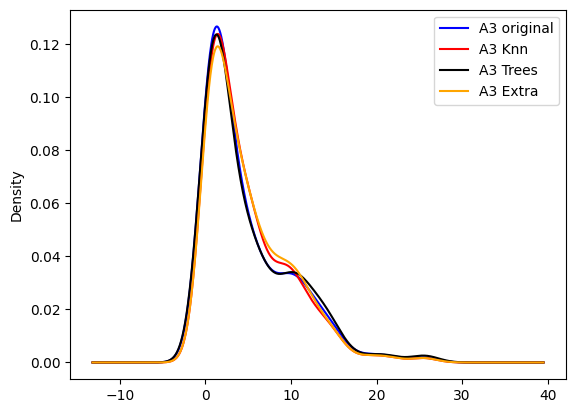

In [73]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_dct['A3'].plot(kind='kde', ax=ax, color='black')
X_train_ext['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 Knn', 'A3 Trees', 'A3 Extra']
ax.legend(lines, labels, loc='best')

plt.show();

#### Hepsi bir arada: Sayisal, Kategorik ve Farkli metotlar

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer


kategorik_imputer_1=SimpleImputer(strategy='constant', fill_value='missing')
kategorik_imputer_2=SimpleImputer(strategy='most_frequent')

sayisal_imputer_1=SimpleImputer(strategy='constant', fill_value=9999)
sayisal_imputer_2=SimpleImputer(strategy='mean')
sayisal_imputer_3=IterativeImputer(estimator=KNeighborsRegressor(),
                                   initial_strategy='mean',
                                   max_iter=100, random_state=0)

preprocessor= ColumnTransformer(transformers=[
    ('kategorik_imputer_1', kategorik_imputer_1, kategorik_degiskenler[:3]),
    ('kategorik_imputer_2', kategorik_imputer_2, kategorik_degiskenler[2:]),
    ('sayisal_imputer_1', sayisal_imputer_1, sayisal_degiskenler[:2]),
    ('sayisal_imputer_2', sayisal_imputer_2, sayisal_degiskenler[2:4]),
    ('sayisal_imputer_3', sayisal_imputer_3, sayisal_degiskenler[1:]),
],remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
((X_train=='missing') | (X_train==9999)).sum()

/opt/homebrew/anaconda3/envs/yzup-veri/lib/python3.11/site-packages/sklearn/impute/_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('kategorik_imputer_1',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 Index(['A13', 'A12'], dtype='object')),
                                ('kategorik_imputer_2',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['A10', 'A9', 'A7', 'A6', 'A5', 'A4', 'A1'], dtype='object')),
                                ('sayisal_imputer_1',
                                 SimpleImputer(fill_value=9999,
                                               strategy='constant'),
                                 Index(['A15', 'A14'], dtype='object')),
                                ('sayisal_imputer_2', SimpleImputer(),
                                 Index(['A11', 'A8'], dtype='object')),
                                ('sayisal_imputer_3',
                                 IterativeImputer(estimator=KNeighborsRegressor(),
                                                  max_iter=100,
                                                  random_state=0),
                                 Index(['A14', 'A11', 'A8', 'A3', 'A2'], dtype='object'))])

kategorik_imputer_1__A13    0
kategorik_imputer_1__A12    0
kategorik_imputer_2__A10    0
kategorik_imputer_2__A9     0
kategorik_imputer_2__A7     0
kategorik_imputer_2__A6     0
kategorik_imputer_2__A5     0
kategorik_imputer_2__A4     0
kategorik_imputer_2__A1     0
sayisal_imputer_1__A15      0
sayisal_imputer_1__A14      7
sayisal_imputer_2__A11      0
sayisal_imputer_2__A8       0
sayisal_imputer_3__A14      0
sayisal_imputer_3__A11      0
sayisal_imputer_3__A8       0
sayisal_imputer_3__A3       0
sayisal_imputer_3__A2       0
dtype: int64

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

from feature_engine.imputation import CategoricalImputer, AddMissingIndicator, MeanMedianImputer, AddMissingIndicator


sayisal_imputer_3=IterativeImputer(estimator=KNeighborsRegressor(),
                                   initial_strategy='mean',
                                   max_iter=100, random_state=0)

preprocessor= ColumnTransformer(transformers=[
    ('sayisal_imputer_3', sayisal_imputer_3, sayisal_degiskenler[4:]),
],remainder='passthrough')


imputer_pipe=Pipeline(steps=[
    ('ka_imputer_1', CategoricalImputer(imputation_method='frequent', variables=kategorik_degiskenler[:2].tolist()   )),
    ('ka_imputer_2', CategoricalImputer(imputation_method='missing', fill_value='Missing', variables=kategorik_degiskenler[2:].tolist()   )),
    ('sa_imputer_1', AddMissingIndicator(variables=sayisal_degiskenler[:2].tolist()   )),
    ('sa_imputer_2', MeanMedianImputer(imputation_method='median', variables=sayisal_degiskenler[4:].tolist()  )),
    ('sa_imputer_3', preprocessor)
])

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

imputer_pipe.fit(X_train)
X_train = imputer_pipe.transform(X_train)
X_test = imputer_pipe.transform(X_test)
X_train.isna().sum()

Pipeline(steps=[('ka_imputer_1',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['A13', 'A12'])),
                ('ka_imputer_2',
                 CategoricalImputer(variables=['A10', 'A9', 'A7', 'A6', 'A5',
                                               'A4', 'A1'])),
                ('sa_imputer_1', AddMissingIndicator(variables=['A15', 'A14'])),
                ('sa_imputer_2', MeanMedianImputer(variables=['A3', 'A2'])),
                ('sa_imputer_3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sayisal_imputer_3',
                                                  IterativeImputer(estimator=KNeighborsRegressor(),
                                                                   max_iter=100,
                                                                   random_state=0),
                                                  Index(['A3', 'A2'], dtype='object'))]))])

sayisal_imputer_3__A3     0
sayisal_imputer_3__A2     0
remainder__A15            0
remainder__A14            7
remainder__A13            0
remainder__A12            0
remainder__A11            0
remainder__A10            0
remainder__A9             0
remainder__A8            68
remainder__A7             0
remainder__A6             0
remainder__A5             0
remainder__A4             0
remainder__A1             0
remainder__A14_na         0
dtype: int64